# Assignment 1
### Mateusz Dzitkoski 249777

In [1]:
from server import server
server.launch(open_browser=True);

Interface starting at http://127.0.0.1:8521


RuntimeError: This event loop is already running

In [1]:
from forest_fire import ForestFire

In [2]:
df = ForestFire.batch_run(size=[20, 50, 100], iterations=100)

  0%|          | 0/30000 [00:00<?, ?it/s]

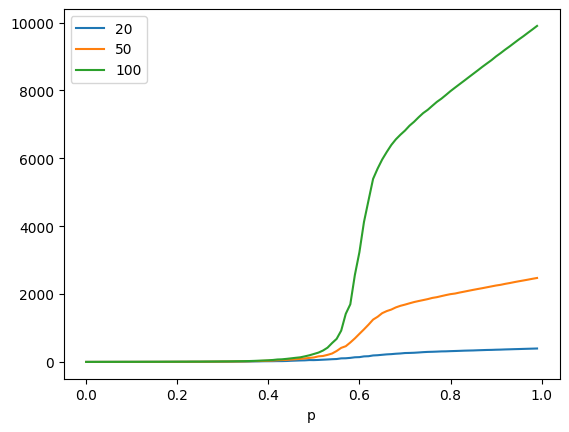

In [21]:
df.groupby(["p", "size"]).mean().reset_index().set_index("p").groupby("size")["biggest_burned_cluster"].plot(legend=True);

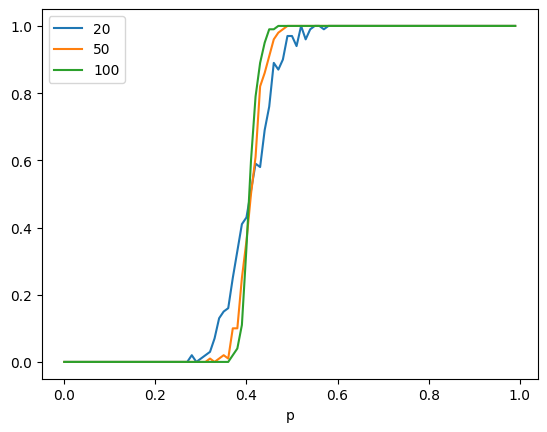

In [20]:
df.groupby(["p", "size"]).mean().reset_index().set_index("p").groupby("size")["opposite_edge_hit"].plot(legend=True);